<p style="font-family: Arials; line-height: 1.3; font-size: 30px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Exploring the news dataset</p>


pip install wordcloud


pip install gensim 

In [128]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd 
import nltk
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.corpus import stopwords
import seaborn as sns 
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
import warnings
warnings.filterwarnings('ignore')

import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KALITOH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Reading the dataset</p>

In [129]:
# Read CSV file into a DataFrame
df = pd.read_csv("news_articles.csv")

# Print the shape of the DataFrame
print(df.shape)

# Display the first few rows of the DataFrame
df.head()


(2096, 12)


,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0


In [130]:
#Checking for null values
df.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

In [131]:
#dropping null values
df.dropna(inplace=True)

---

<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Exploratory data analysis</p>

### Let's visualize the proportion of real and fake news!

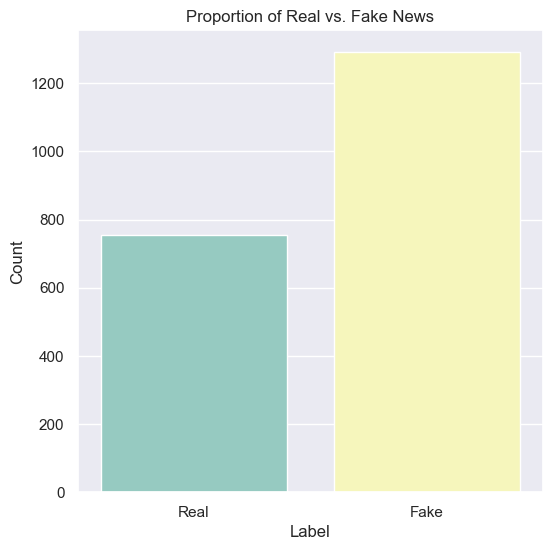

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pie chart using matplotlib and seaborn
plt.figure(figsize=(6, 6))
sns.set_palette("pastel")  # Set color palette
sns.countplot(x='label', data=df, palette="Set3")
plt.title('Proportion of Real vs. Fake News')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


### Languages of News Articles

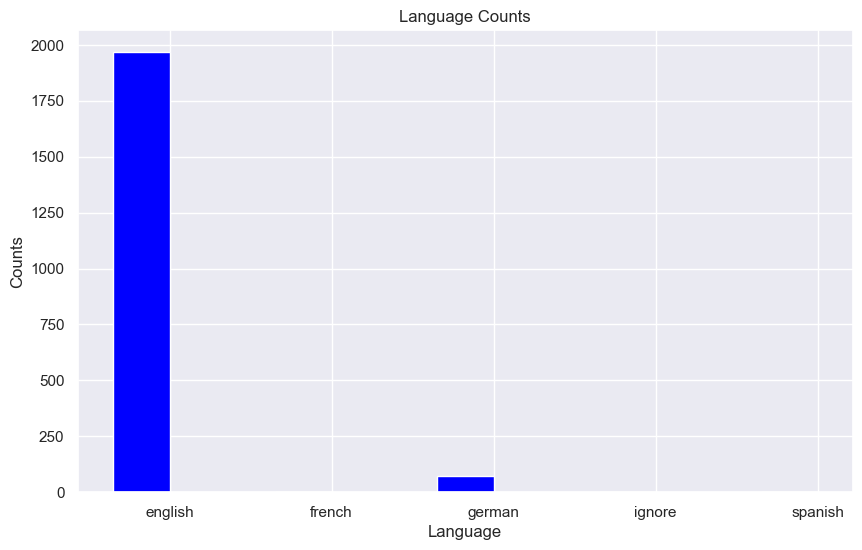

In [133]:
import matplotlib.pyplot as plt

# Group by 'language' and count occurrences
sub_tf_df = df.groupby('language').size().reset_index(name='Counts')

# Set up figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
bar_width = 0.35
bar_positions = range(len(sub_tf_df))
ax.bar(bar_positions, sub_tf_df['Counts'], color='blue', width=bar_width)
ax.set_xticks([p + bar_width/2 for p in bar_positions])
ax.set_xticklabels(sub_tf_df['language'])
ax.set_xlabel('Language')
ax.set_ylabel('Counts')
ax.set_title('Language Counts')

# Show the plot
plt.show()


As we can see, English is the most common language in which most news articles are written

### Visualizing count of news articles by type

In [134]:
import plotly.express as px

# Group data by 'type' and count occurrences
sub_check = df.groupby('type').apply(lambda x: x['type'].count()).reset_index(name='Counts')

# Create a scatterplot with size and color encoding based on counts
fig = px.scatter(sub_check, x='type', y='Counts', size='Counts', color='Counts', title='Count of News Articles by Type')
fig.update_traces(marker=dict(sizemode='diameter', sizeref=0.1)) # adjust marker size
fig.show()


here we can se that most news are of type bs (i.e. bullshit)

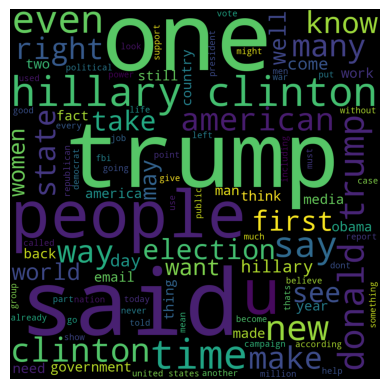

In [135]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create an instance of WordCloud with specified parameters
wc = WordCloud(background_color="black", max_words=100, max_font_size=256, random_state=42, width=1000, height=1000)

# Generate the word cloud from the text data in the DataFrame
wc.generate(' '.join(df['text_without_stopwords']))

# Display the word cloud using matplotlib
plt.imshow(wc)
plt.axis('off')
plt.show()


### Visualizing top 10 unigrams and bigrams

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

# Function to get the top n words from a given corpus
def get_top_n_words(corpus, n=None):
    # Initialize a CountVectorizer and fit it to the corpus
    vec = CountVectorizer().fit(corpus)
    # Transform the corpus into a bag of words representation
    bag_of_words = vec.transform(corpus)
    # Sum the word occurrences along the axis 0 (columns) to get the total count for each word
    sum_words = bag_of_words.sum(axis=0) 
    # Create a list of (word, count) tuples from the vocabulary of the CountVectorizer and the sum of word occurrences
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # Sort the list of tuples based on the count in descending order
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    # Return the top n words based on the specified value of n
    return words_freq[:n]

# Function to get the top n bigrams from a given corpus
def get_top_n_bigram(corpus, n=None):
    # Initialize a CountVectorizer with ngram_range=(2, 2) to extract bigrams
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    # Transform the corpus into a bag of words representation
    bag_of_words = vec.transform(corpus)
    # Sum the bigram occurrences along the axis 0 (columns) to get the total count for each bigram
    sum_words = bag_of_words.sum(axis=0) 
    # Create a list of (bigram, count) tuples from the vocabulary of the CountVectorizer and the sum of bigram occurrences
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    # Sort the list of tuples based on the count in descending order
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    # Return the top n bigrams based on the specified value of n
    return words_freq[:n]

# Function to get the average word length in a given corpus
def get_avg_word_length(corpus):
    # Initialize an empty list to store word lengths
    word_lengths = []
    # Loop through each document in the corpus
    for doc in corpus:
        # Split the document into words
        words = doc.split()
        # Loop through each word in the document and append its length to the list of word lengths
        for word in words:
            word_lengths.append(len(word))
    # Calculate the average word length by dividing the sum of word lengths by the total number of words
    avg_word_length = sum(word_lengths) / len(word_lengths)
    # Return the average word length
    return avg_word_length

# Function to get the total number of words in a given corpus
def get_total_word_count(corpus):
    # Initialize a CountVectorizer and fit it to the corpus
    vec = CountVectorizer().fit(corpus)
    # Transform the corpus into a bag of words representation
    bag_of_words = vec.transform(corpus)
    # Sum the word occurrences along the axis 0 (columns) to get the total count for each word
    sum_words = bag_of_words.sum(axis=0) 
    # Get the total word count by summing the values in the sum_words array
    total_word_count = sum(sum_words)
    # Return the total word count
    return total


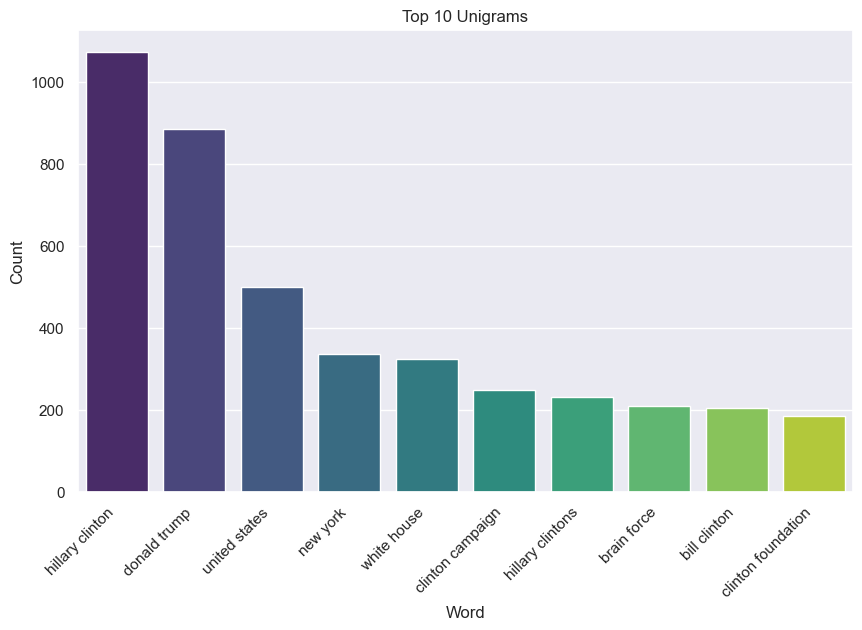

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming common_words is a list of tuples with ('word', count) pairs

# Extracting word and count into separate lists
words = [word for word, count in common_words]
counts = [count for word, count in common_words]

# Creating a dataframe from the lists
df2 = pd.DataFrame({'word': words, 'count': counts})

# Grouping by word and summing the counts
df2 = df2.groupby('word').sum().reset_index()

# Sorting by count in descending order
df2 = df2.sort_values('count', ascending=False)

# Creating a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='word', y='count', data=df2, palette='viridis')
plt.title('Top 10 Unigrams')
plt.xlabel('Word')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [138]:
common_words = get_top_n_bigram(df['text_without_stopwords'], 10)
df2 = pd.DataFrame(common_words,columns=['word','count'])
df2.groupby('word').sum()['count'].sort_values(ascending=False)
fig=px.bar(df2,x='word',y='count',color='count',title='Top 10 bigrams')
fig.show()

### Visualizing top 5 authors 

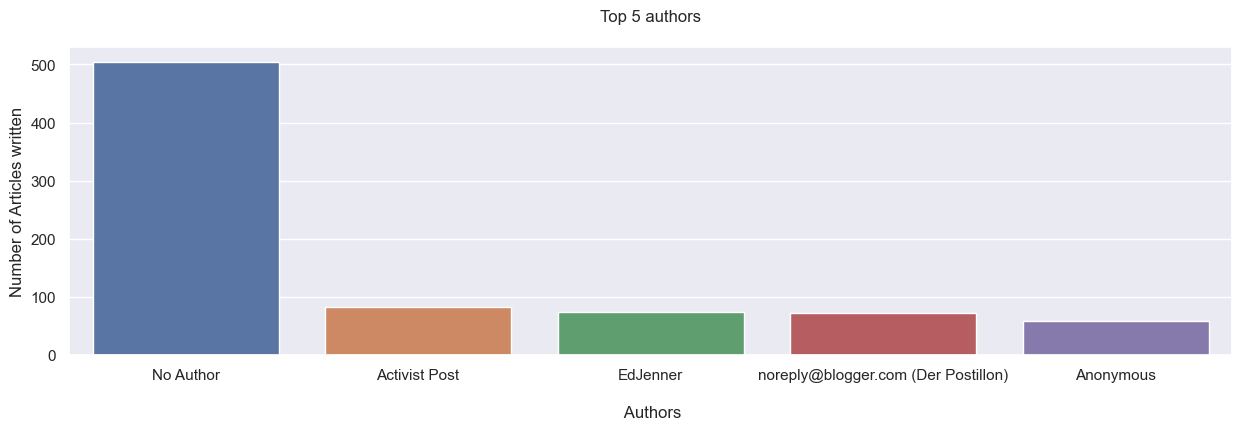

In [139]:
d = df['author'].value_counts().sort_values(ascending=False).head(5)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 5 authors

# Plotting
sns.set()
plt.figure(figsize=(15,4))
sns.barplot(x='index', y='author', data=d)
plt.xlabel("\n Authors")
plt.ylabel("Number of Articles written")
plt.title("Top 5 authors\n")
plt.show()

### Visualizing top 10 fake news site

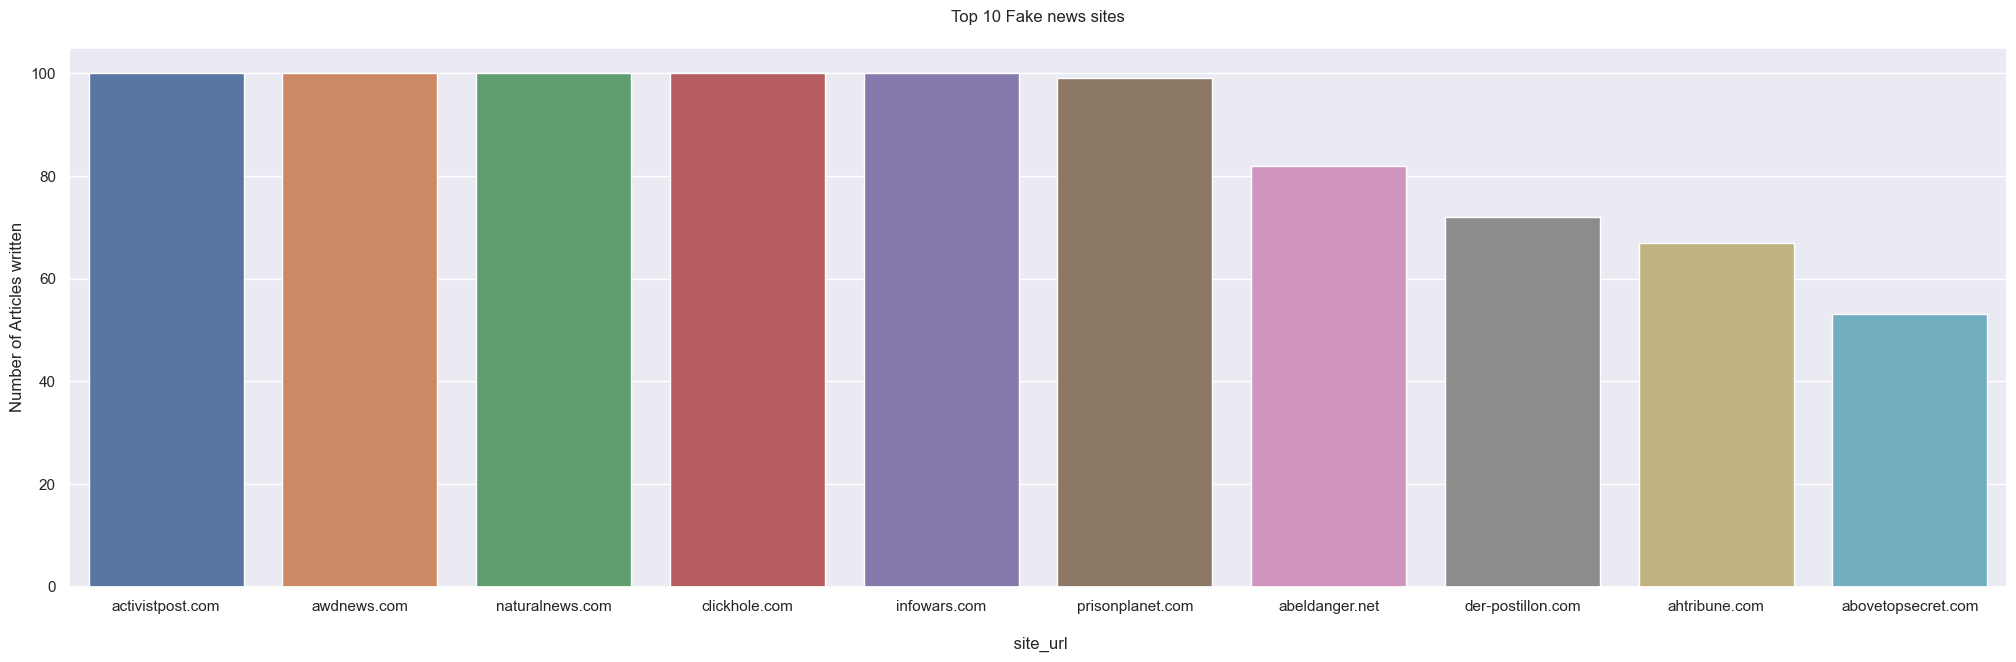

In [140]:
d = df[df['label'] == 'Fake']['site_url'].value_counts().sort_values(ascending=False).head(10)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 10 fake news site

# Plotting
sns.set()
plt.figure(figsize=(25,7))
sns.barplot(x='index', y='site_url', data=d)
plt.xlabel("\n site_url")
plt.ylabel("Number of Articles written")
plt.title("Top 10 Fake news sites\n")
plt.show()


### Let's have a look at the top 10 trustworthy news sites

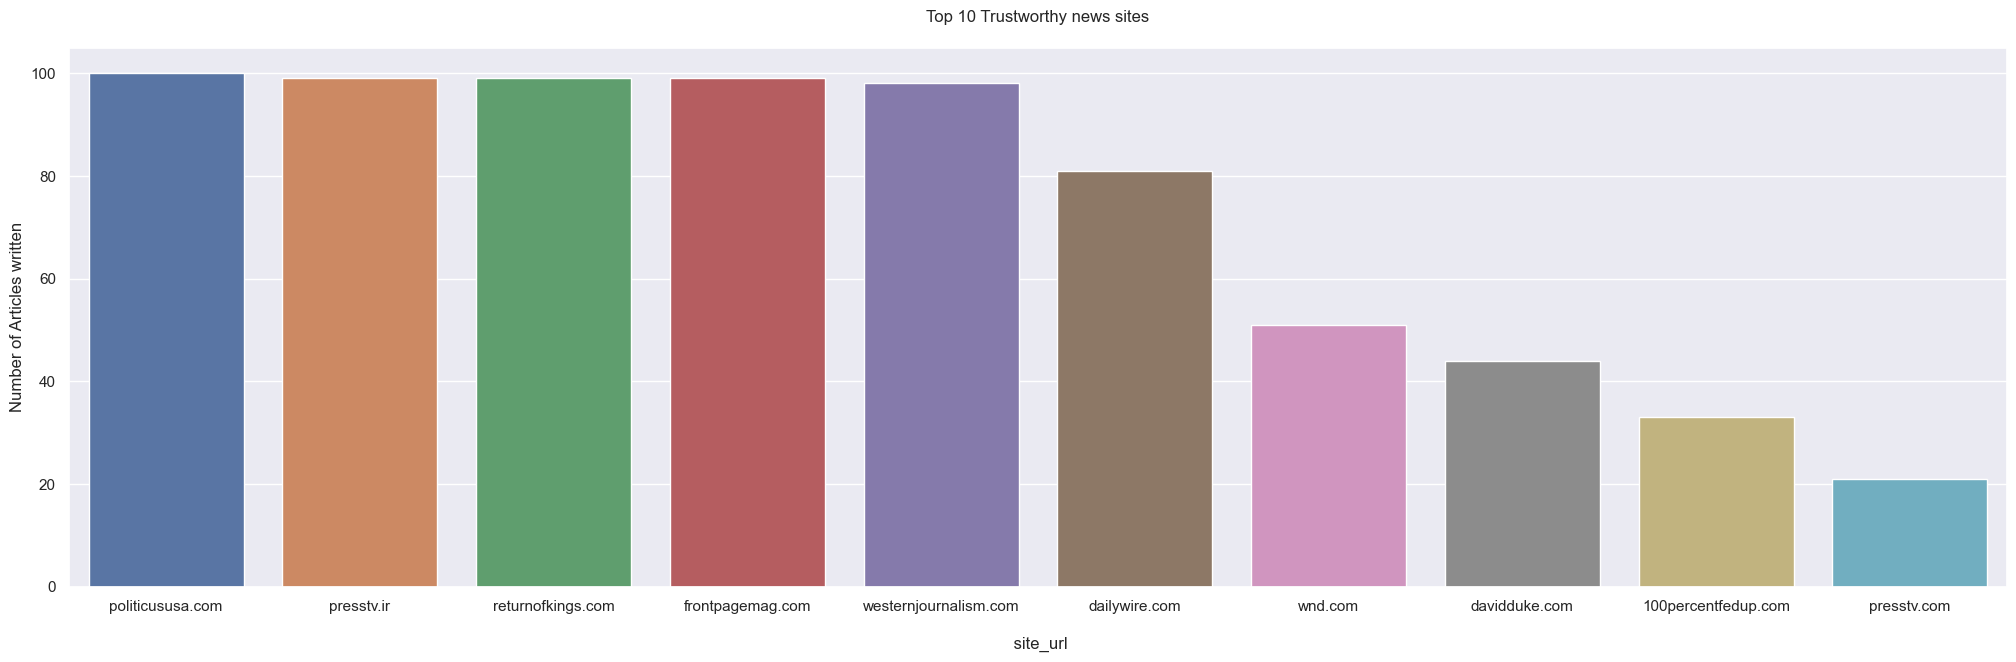

In [141]:
d = df[df['label'] == 'Real']['site_url'].value_counts().sort_values(ascending=False).head(10)
d = pd.DataFrame(d)
d = d.reset_index() # dataframe with top 10 Trustworthy news site

# Plotting
sns.set()
plt.figure(figsize=(25,7))
sns.barplot(x='index', y='site_url', data=d)
plt.xlabel("\n site_url")
plt.ylabel("Number of Articles written")
plt.title("Top 10 Trustworthy news sites\n")
plt.show()

In [142]:
#Let's reshuffle the dataset
df = df.sample(frac = 1)

#taking the features
features = df[['site_url', 'text_without_stopwords']]
features.head(5)

features['url_text'] = features["site_url"].astype(str) + " " + features["text_without_stopwords"]
features.drop(['site_url', 'text_without_stopwords'], axis = 1, inplace = True)

features.head()

,url_text
1992,whatreallyhappened.com trump vs clinton risk v...
1729,returnofkings.com two hollywood films men leav...
1953,westernjournalism.com anatomy lesson published...
101,abeldanger.net dark alright sad twist fate bla...
1181,infowars.com aids patient zero source outbreak...


In [143]:
X = features
y = df['type']
y = y.tolist()

In [144]:
#Splitting the dataset and using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

tfidf_vectorizer = TfidfVectorizer(use_idf = True, stop_words = 'english')

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['url_text'])
X_test_tfidf = tfidf_vectorizer.transform(X_test['url_text'])

In [145]:
tfidf_train = pd.DataFrame(X_train_tfidf.A, columns = tfidf_vectorizer.get_feature_names())

In [146]:
tfidf_train.head(10)

,100percentfedup,21stcenturywire,___,_url,aa,aab,aadmi,aafe,aah,aaja,...,überraschende,überreden,überreicht,überschwänglich,übertrieben,überwachungskamera,überwältigen,übrig,übrige,übte
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Above is the representation of tf-idf matrix

---
<p style="font-family: Arials; line-height: 1.3; font-size: 27px; font-weight: bold; letter-spacing: 2px; text-align: center; color: #23527c">Modelling</p>

In [147]:
Adab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=10),n_estimators=5,random_state=1)
Adab.fit(tfidf_train, y_train)
y_pred3 = Adab.predict(X_test_tfidf)
ABscore = metrics.accuracy_score(y_test,y_pred3)
print("accuracy: %0.3f" %ABscore)

accuracy: 0.930
